In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
print(df.head())

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [4]:
features = ['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']
X = df[features]
y = df['Selling_Price']

In [5]:
X = pd.get_dummies(X, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)
X

,Year,Present_Price,Driven_kms,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,2014,5.59,27000,0,0,1,0,1
1,2013,9.54,43000,0,1,0,0,1
2,2017,9.85,6900,0,0,1,0,1
3,2011,4.15,5200,0,0,1,0,1
4,2014,6.87,42450,0,1,0,0,1
...,...,...,...,...,...,...,...,...
296,2016,11.60,33988,0,1,0,0,1
297,2015,5.90,60000,0,0,1,0,1
298,2009,11.00,87934,0,0,1,0,1
299,2017,12.50,9000,0,1,0,0,1


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(     Year  Present_Price  Driven_kms  Owner  Fuel_Type_Diesel  \
 184  2008          0.750       26000      1                 0   
 132  2017          0.950        3500      0                 0   
 194  2008          0.787       50000      0                 0   
 75   2015          6.800       36000      0                 0   
 111  2016          1.500        8700      0                 0   
 ..    ...            ...         ...    ...               ...   
 188  2013          0.570       18000      0                 0   
 71   2011         12.480       45000      0                 1   
 106  2014          3.450       16500      1                 0   
 270  2011         10.000       69341      0                 0   
 102  2017          1.780        4000      0                 0   
 
      Fuel_Type_Petrol  Selling_type_Individual  Transmission_Manual  
 184                 1                        1                    1  
 132                 1                        1                 

In [7]:
model = LinearRegression()
model

LinearRegression()

In [8]:
model.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = model.predict(X_test)
y_pred

array([ 2.95433731,  8.17716341,  6.45612271, -1.42337164,  9.08864657,
        7.41793553,  1.33513921,  0.84032259,  1.36320242,  7.49067757,
        9.11623744,  0.58602147,  8.4171901 ,  3.42182892,  6.90176412,
        3.05018044,  0.4861294 , 10.7066932 ,  1.74950537,  2.34321858,
        0.3983127 ,  8.11856504,  6.62720292,  2.66249362,  0.78244173,
        3.69502798,  5.24822431,  2.82925881,  2.13370568,  1.75038508,
        0.39804532,  9.11715068, -0.65878346,  2.29562782,  8.5693085 ,
        4.49098276,  7.20461351,  7.54096855,  2.89153082,  7.9380318 ,
        3.94218138,  4.27826846,  4.33243831,  0.60013063,  7.34017047,
        0.47635371,  7.29115924, 11.23338227,  3.1391956 ,  5.38488332,
        6.80049399,  2.1763552 , 20.63141992, 16.99979702,  7.50636179,
        9.6950184 ,  4.47468976,  8.97255903,  1.82948926,  7.6037684 ,
        0.2226926 ])

In [10]:
mse = mean_squared_error(y_test, y_pred)
mse

3.4813498305149753

In [11]:
r2 = r2_score(y_test, y_pred)
r2

0.8488707839191783

In [12]:
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 3.4813498305149753
R^2 Score: 0.8488707839191783


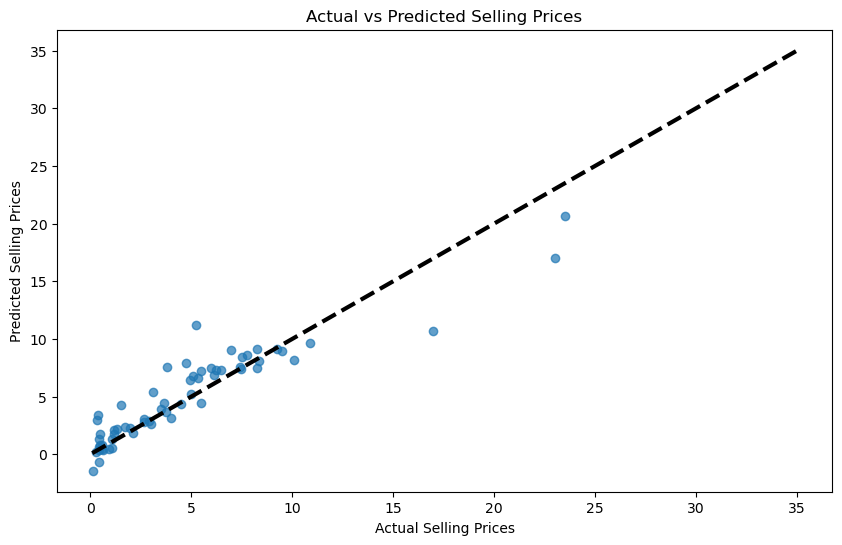

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Selling Prices')
plt.ylabel('Predicted Selling Prices')
plt.title('Actual vs Predicted Selling Prices')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
plt.show()

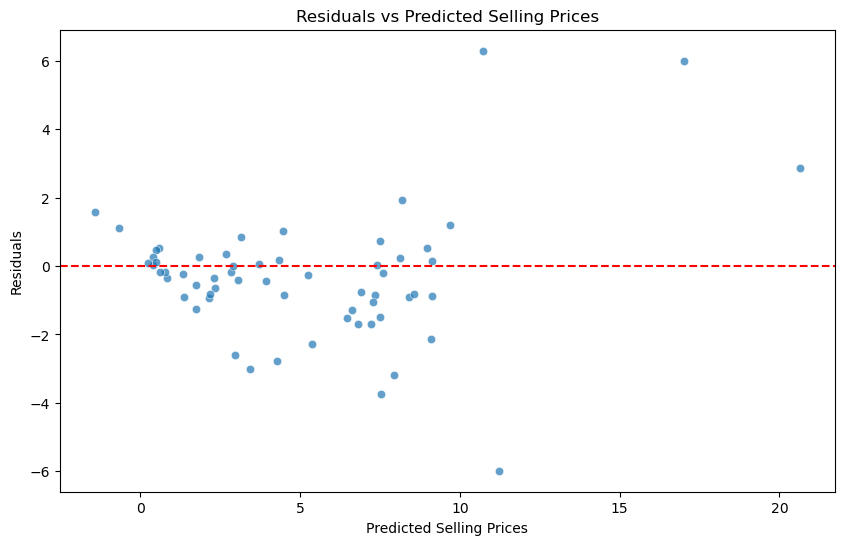

In [15]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Selling Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Selling Prices')
plt.show()

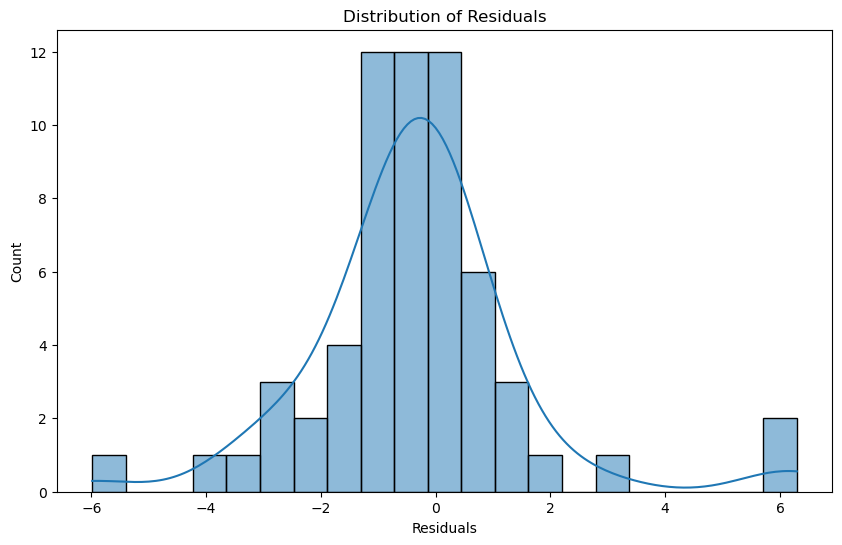

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

In [17]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients = coefficients.sort_values(by='Coefficient')


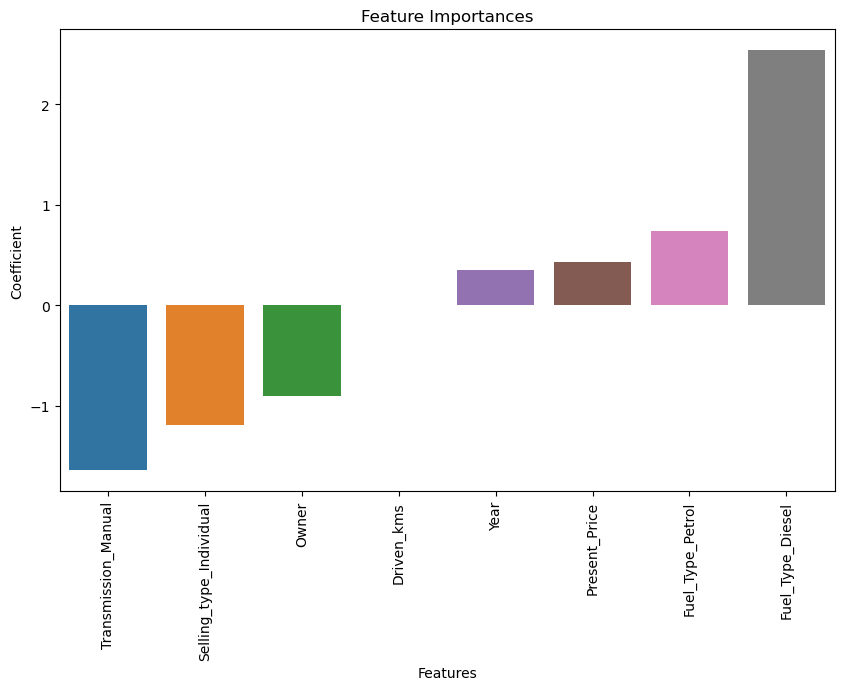

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients.index, y='Coefficient', data=coefficients)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Feature Importances')
plt.show()

In [21]:
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('linear_regression', LinearRegression())
])


In [22]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('linear_regression', LinearRegression())])

In [23]:
y_pred = pipeline.predict(X_test)
y_pred

array([ 0.1040764 , 10.17499925,  5.10926439,  0.08613206,  9.26459886,
        6.82685472,  0.95844652,  0.55878831,  0.40613939,  6.88569261,
       10.28974535,  0.68476488,  8.49909593,  0.65974046,  5.76765062,
        2.62952806,  0.97071458, 14.81672288,  0.5952263 ,  1.96870042,
        0.32209398,  8.07264329,  5.05366136,  2.69269945,  0.47919847,
        3.54114915,  4.92884447,  2.74512865,  1.47034837,  1.22742845,
        0.33308031,  9.70576097,  0.27253343,  2.27643968,  9.15382005,
        4.34125902,  6.56702806,  4.70765306,  2.495739  ,  5.97840501,
        1.2459221 ,  0.3462639 ,  4.27570726,  0.18854906,  6.59058763,
        0.50281908,  7.71235277,  5.71003343,  2.86909105,  3.4811516 ,
        6.0103264 ,  1.57868577, 25.21735765, 22.58015062,  7.17304613,
       10.17634202,  4.45539476,  9.92621995,  1.88825609,  7.6509514 ,
        0.07624437])

In [24]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [25]:
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.6603247220346687
R^2 Score: 0.9713345792700402


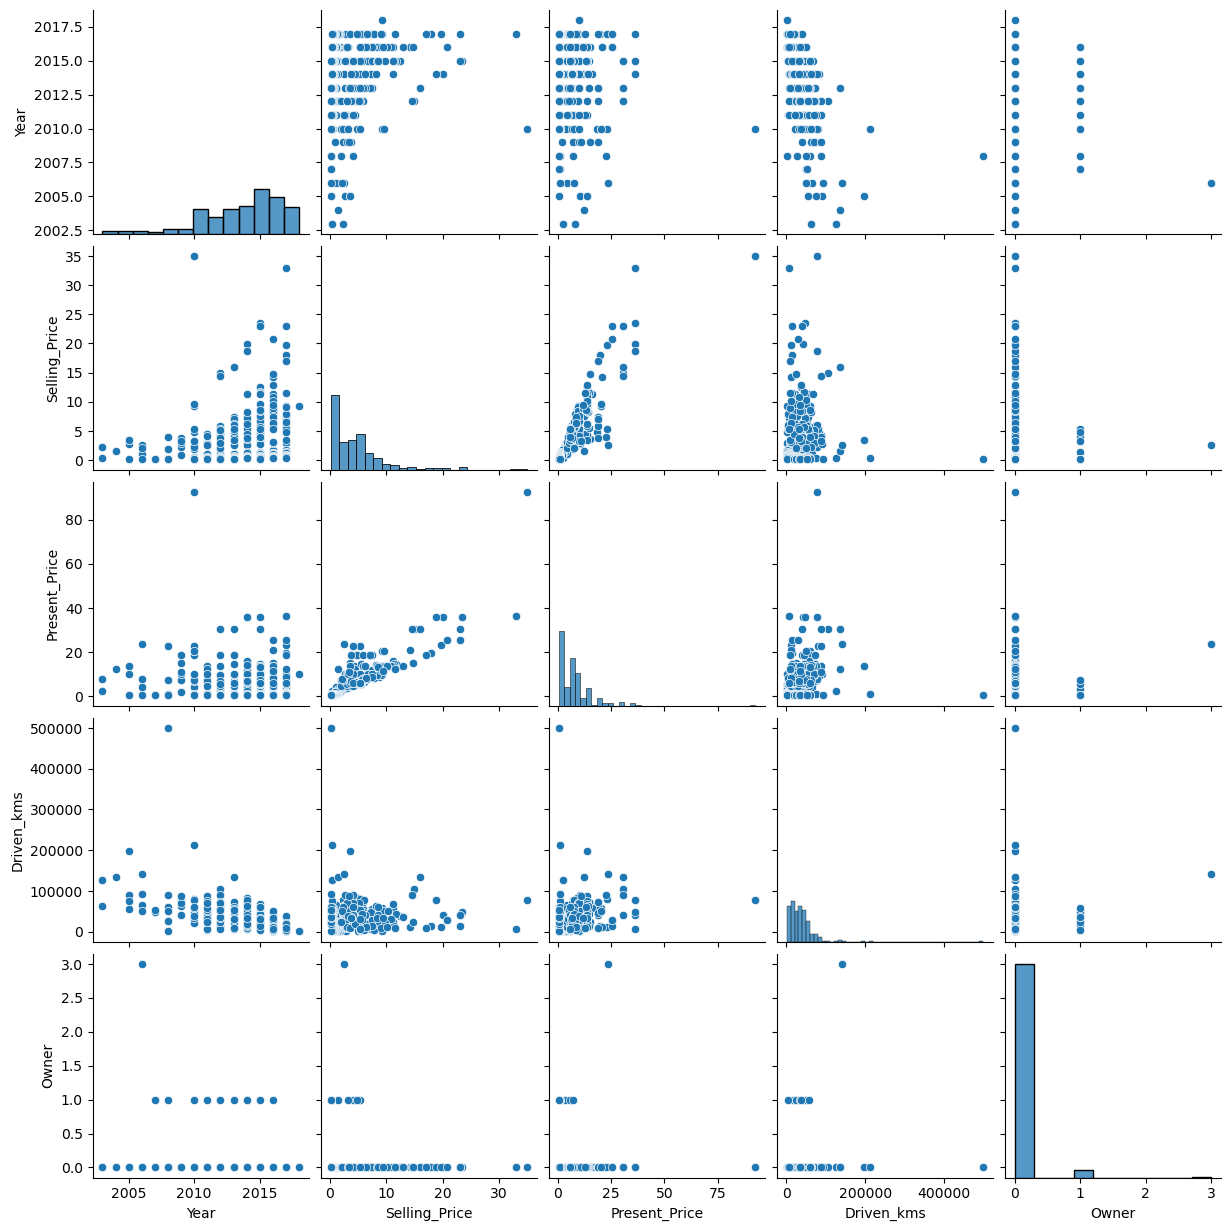

In [27]:
sns.pairplot(df)
plt.show()


C:\Users\Aditya Kudva\AppData\Local\Temp\ipykernel_15920\1703484852.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


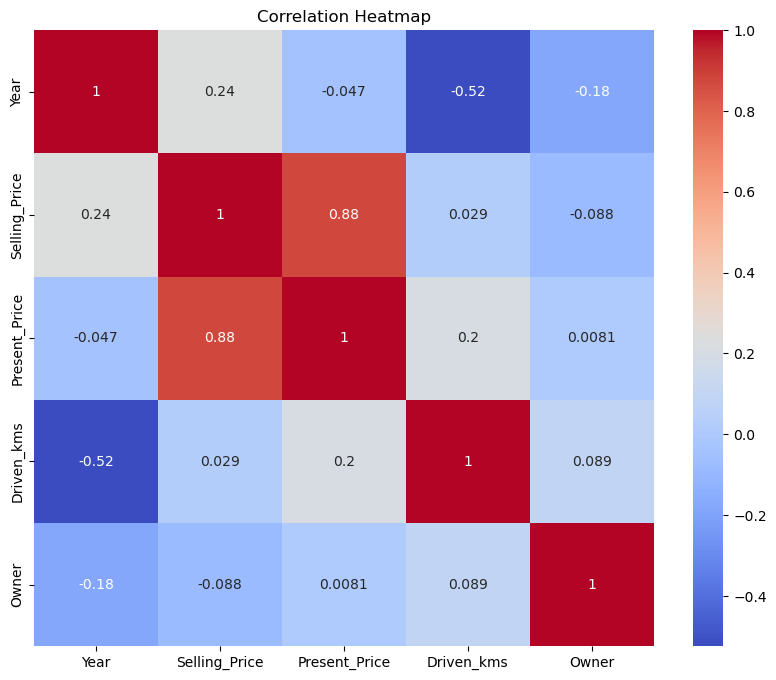

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [31]:
train_sizes, train_scores, test_scores = learning_curve(pipeline, X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))
train_sizes, train_scores, test_scores 

(array([ 24,  48,  72,  96, 120, 144, 168, 192, 216, 240]),
 array([[-0.0501817 , -0.07571879, -0.07571879, -0.07571879, -0.07571879],
        [-0.47132889, -0.14623978, -0.14623978, -0.14623978, -0.14623978],
        [-0.35012011, -0.24790623, -0.43733808, -0.43733808, -0.43733808],
        [-0.26991532, -0.19095776, -0.73569316, -0.73569316, -0.73569316],
        [-0.2363127 , -0.15601609, -0.70213232, -0.70213232, -0.70213232],
        [-0.24367529, -0.13700329, -0.62300888, -0.60061386, -0.60061386],
        [-0.33509282, -0.22961672, -0.6243216 , -0.52065555, -0.52065555],
        [-0.34127273, -0.27284926, -0.61569563, -0.49540278, -0.47864475],
        [-0.34493704, -0.27114582, -0.58394134, -0.48297896, -0.46598378],
        [-0.36933595, -0.28927183, -0.56769158, -0.47097342, -0.4970701 ]]),
 array([[-2.43831540e+05, -2.71098222e+04, -5.32870092e+03,
         -4.98814288e+03, -2.69516862e+02],
        [-9.24281860e+23, -5.57867053e+03, -1.24586538e+00,
         -3.95172162e+00

In [32]:
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)


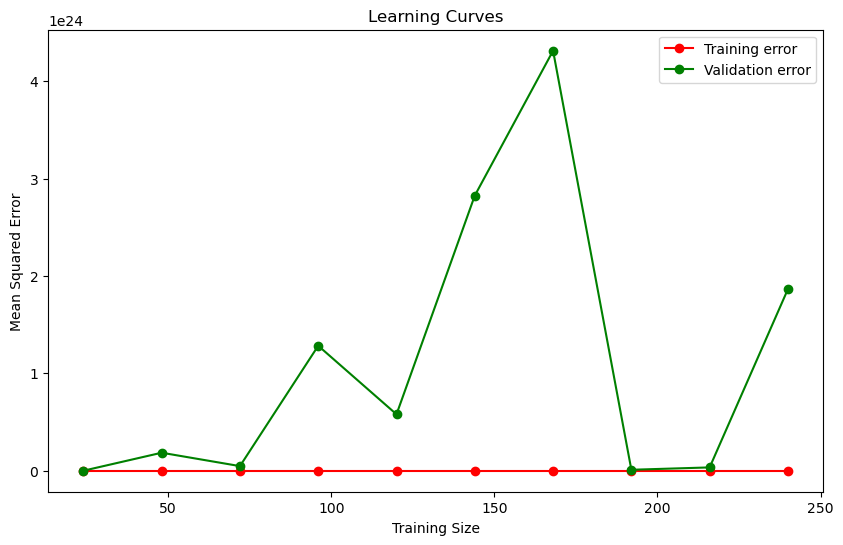

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training error')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validation error')
plt.xlabel('Training Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.show()